In [15]:
import pandas as pd
import numpy as np
import copy
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# Import data

In [2]:
data = pd.read_csv('../../data/train_airbnb_berlin_preprocessed.csv', delimiter = ';')

# Prepare data for linear regression

In [4]:
# Now that we have extracted all the gender info from 'Host Name' we delete the feature
del data['Host Name']

# All the information in 'Postal Code' is in 'Longitude', 'Latitude', 'neighborhood' and 'Neighborhood Group'
del data['Postal Code']

# Just for now
del data['neighbourhood']

In [5]:
# We encode 'Neighborhood Group' classes into a one hot encoder
encoder = pd.get_dummies(data['Neighborhood Group'], dtype = 'int64')
for feature in encoder.columns:
    data[feature] = encoder[feature]

del data['Neighborhood Group']

In [17]:
data.head()

,Host Since,Host Response Rate,Is Superhost,Latitude,Longitude,Is Exact Location,Accomodates,Bathrooms,Bedrooms,Beds,...,Lichtenberg,Marzahn - Hellersdorf,Mitte,NeukÃ¶lln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - SchÃ¶neberg,Treptow - KÃ¶penick
0,1206,0.92,0,52.54652,13.41792,1,2,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2224,0.92,0,52.56512,13.42214,1,2,1.0,2.0,2.0,...,0,0,0,0,1,0,0,0,0,0
2,1188,0.92,0,52.54741,13.42521,1,3,1.0,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0
3,318,0.92,0,52.50958,13.45144,1,2,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2185,0.92,1,52.52995,13.41558,1,3,1.0,1.0,2.0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15268 entries, 0 to 15267
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Host Name                              13899 non-null  object 
 1   Host Since                             15268 non-null  int64  
 2   Host Response Rate                     15268 non-null  float64
 3   Is Superhost                           15268 non-null  int64  
 4   neighbourhood                          15078 non-null  object 
 5   Neighborhood Group                     15268 non-null  object 
 6   Postal Code                            14220 non-null  float64
 7   Latitude                               15268 non-null  float64
 8   Longitude                              15268 non-null  float64
 9   Is Exact Location                      15268 non-null  int64  
 10  Accomodates                            15268 non-null  int64  
 11  Ba

# Split train and test sets

In [7]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0)

[]

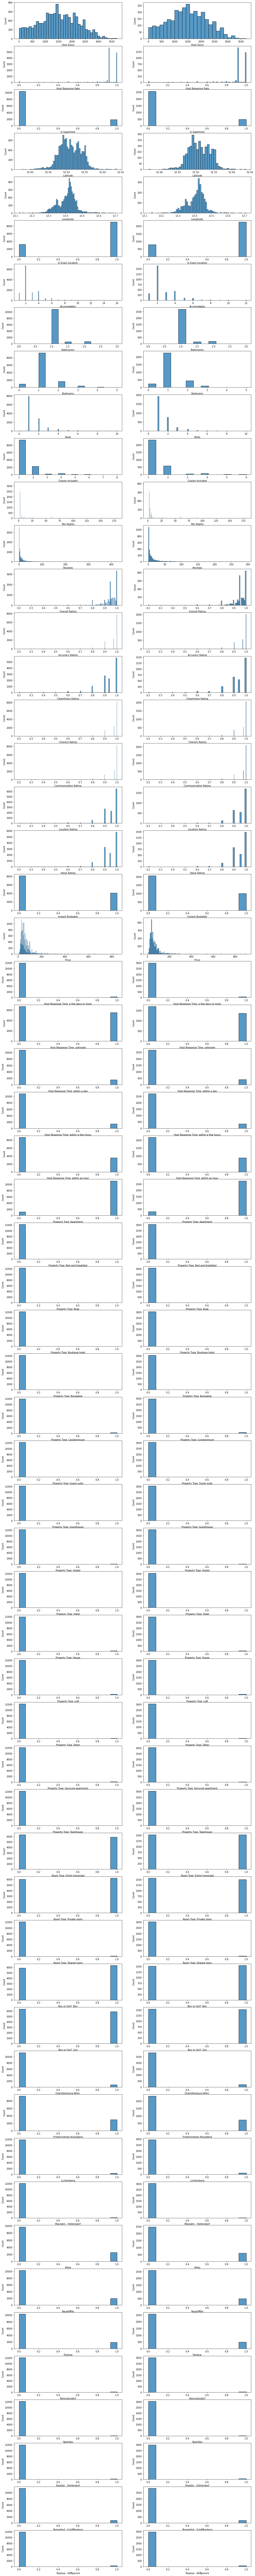

In [8]:
fig = plt.figure(figsize=(18, 200))
gs = GridSpec(len(data.columns), 2)

for index, feature in enumerate(data.columns):
    ax = fig.add_subplot(gs[index, 0])
    sb.histplot(train_set, x=feature, ax=ax)
    ax = fig.add_subplot(gs[index, 1])
    sb.histplot(test_set, x=feature, ax=ax)

plt.plot()

If# All variables seem very alicke in both train and test sets so there is no need to stratify

In [16]:
# If you want to you can check for specific variable proportions with this code

def feature_proportions(data, feature):
    return data[feature].value_counts() / len(data)


compare_props = pd.DataFrame({
    "Input_dataset": feature_proportions(data, 'Boy or Girl?_Boy'),
    "Train_set": feature_proportions(train_set, 'Boy or Girl?_Boy'),
    "Test_set": feature_proportions(test_set, 'Boy or Girl?_Boy')
}).sort_index()
compare_props["Test set. %error"] = 100 * compare_props["Test_set"] / compare_props["Input_dataset"] - 100
compare_props["Train set. %error"] = 100 * compare_props["Train_set"] / compare_props["Input_dataset"] - 100

compare_props

,Input_dataset,Train_set,Test_set,Test set. %error,Train set. %error
0,0.483102,0.480023,0.495416,2.548931,-0.637337
1,0.516898,0.519977,0.504584,-2.382275,0.595666


In [12]:
def create_matrices(train_set, test_set):
        
    X_train = train_set.drop('Price', axis=1)
    y_train = train_set["Price"].copy()

    X_test = test_set.drop("Price", axis=1)
    y_test = test_set["Price"].copy()
    return X_train, y_train, X_test, y_test
    
X_train, y_train, X_test, y_test = create_matrices(train_set, test_set)

# Standardize data

In [ ]:
features = X_train.columns
initial_categorical_features = [
    'Is Superhost', 
    'Is Superhost', 
    'Accomodates',
    '',
    '',
    '',
    ''
]
numerical_features = []
categorical_features = []

for feature in features:
    for initial_categorical_feature in initial_categorical_features:
        if initial_categorical_feature in feature:
            categorical_features.append(feature)
        else:
            numerical_features.append(feature)

In [ ]:
scaler = StandardScaler()


# Linear Regression